In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Examining the Data

In [2]:
# read the data
users_data = pd.read_pickle("../data/users_data_final.pkl")


In [3]:
# preview the data

users_data.head(n = 3)

,user_id,number_transactions,total_amount_usd,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,term_deposit,date_joined,device
0,9231c446-cb16-4b2b-a7f7-ddfc8b25aaf6,3.0,2143.0,58,management,married,tertiary,False,True,False,None,261,1,-1,0,None,False,1998-08-23,mobile
1,bb92765a-08de-4963-b432-496524b39157,NaN,NaN,44,technician,single,secondary,False,True,False,None,151,1,-1,0,None,False,2008-07-15,desktop
2,573de577-49ef-42b9-83da-d3cfb817b5c1,2.0,2.0,33,entrepreneur,married,secondary,False,True,True,None,76,1,-1,0,None,False,2002-06-04,mobile


In [9]:
# check the shape of the data

users_data.shape

(45209, 19)

In [10]:
print("# of rows:", users_data.shape[0])
print("# of columns:", users_data.shape[1])


# of rows: 45209
# of columns: 19


In [11]:
# count how many unique users we have

len(np.unique(users_data.user_id))

# this should be the same as the number of rows, otherwise we have duplicates

45209

In [12]:
# check the structure of the data

users_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45209 entries, 0 to 45215
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              45209 non-null  object        
 1   number_transactions  35210 non-null  float64       
 2   total_amount_usd     35210 non-null  float64       
 3   age                  45209 non-null  int64         
 4   job                  44921 non-null  object        
 5   marital              45209 non-null  object        
 6   education            43352 non-null  object        
 7   default              45209 non-null  bool          
 8   housing              45209 non-null  bool          
 9   loan                 45209 non-null  bool          
 10  contact              32191 non-null  object        
 11  duration             45209 non-null  int64         
 12  campaign             45209 non-null  int64         
 13  pdays                45209 non-

In [13]:
# if we are interested in all the variables with data type object

categorical_cols = list(users_data.select_dtypes(['object']).columns)
print(categorical_cols)

['user_id', 'job', 'marital', 'education', 'contact', 'poutcome', 'device']


In [14]:
len(categorical_cols)

7

In [15]:
users_data.device.value_counts(dropna = False)

mobile     27504
desktop    12112
tablet      5499
None          94
Name: device, dtype: int64

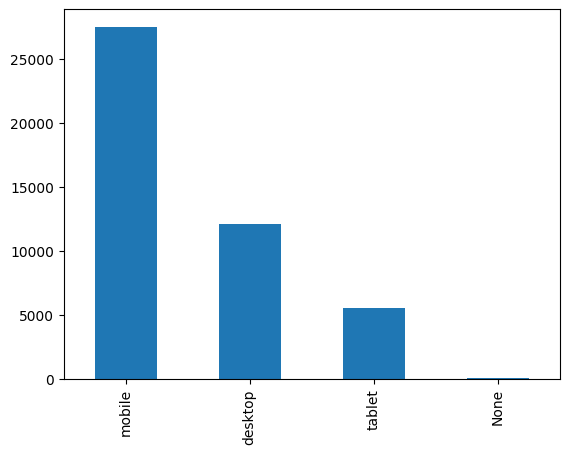

In [9]:
# distribution of device

users_data.device.value_counts(dropna = False).plot(kind = 'bar');

# signs of missing data

In [10]:
# generate summary stats for the data

users_data.describe()

,number_transactions,total_amount_usd,age,duration,campaign,pdays,previous
count,35210.000000,35210.000000,45209.000000,45209.000000,45209.000000,45209.000000,45209.000000
mean,3.977052,1369.417751,40.935853,258.153067,2.763897,40.199651,0.580349
std,3.814329,3063.412688,10.618653,257.525446,3.098076,100.130586,2.303489
min,1.000000,-8019.000000,18.000000,0.000000,1.000000,-1.000000,0.000000
25%,2.000000,73.000000,33.000000,103.000000,1.000000,-1.000000,0.000000
50%,3.000000,451.000000,39.000000,180.000000,2.000000,-1.000000,0.000000
75%,4.000000,1438.000000,48.000000,319.000000,3.000000,-1.000000,0.000000
max,20.000000,102127.000000,95.000000,4918.000000,63.000000,871.000000,275.000000


In [11]:
# check the summary stats for one numerical var
# you can replace total_amount_usd with any numerical column

users_data.total_amount_usd.describe()

count     35210.000000
mean       1369.417751
std        3063.412688
min       -8019.000000
25%          73.000000
50%         451.000000
75%        1438.000000
max      102127.000000
Name: total_amount_usd, dtype: float64

In [18]:
# mean and std

avg = users_data.total_amount_usd.mean()
std = users_data.total_amount_usd.std()

print(round(avg,2), ",", round(std,2))

1369.42 , 3063.41


In [19]:
# q1 and q3
# if we had no missing values we could use np.percentile

q1 = np.nanpercentile(users_data.total_amount_usd, 25)
q3 = np.nanpercentile(users_data.total_amount_usd, 75)

print("25th percentie:", q1)
print("75th percentie:", q3)

25th percentie: 73.0
75th percentie: 1438.0


### Visualising the Data

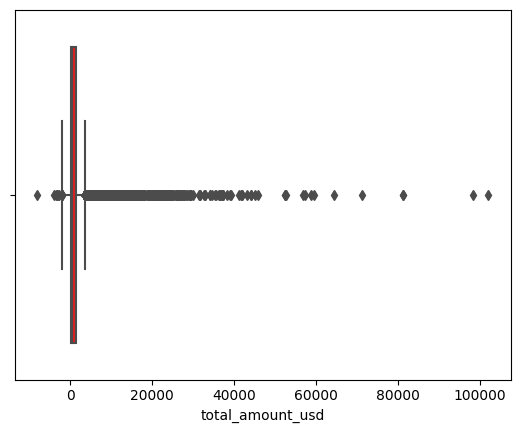

In [20]:
# plot a boxplot for a numerical column

sns.boxplot(x = users_data.total_amount_usd, color = 'red');

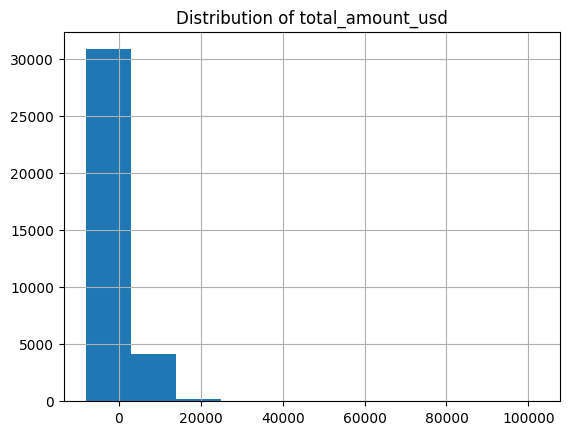

In [21]:
# plot a histogram for the numerical data

users_data.total_amount_usd.hist()
plt.title("Distribution of total_amount_usd");

# what is the distribution of this variable?

In [22]:
users_data.total_amount_usd.describe()

count     35210.000000
mean       1369.417751
std        3063.412688
min       -8019.000000
25%          73.000000
50%         451.000000
75%        1438.000000
max      102127.000000
Name: total_amount_usd, dtype: float64

In [23]:
iqr = q3 - q1
UB = q3 + 1.5*iqr
LB = q1 - 1.5*iqr

print("Values above", UB, "and values below", LB, "are outliers")

Values above 3485.5 and values below -1974.5 are outliers


In [26]:
# subsetting the data frame where total amount usd is greater than UB and less than LB

users_data[(users_data.total_amount_usd > UB) |
          (users_data.total_amount_usd < LB)]

,user_id,number_transactions,total_amount_usd,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,term_deposit,date_joined,device
34,099a8041-e91d-4935-9a11-d21bb5747a49,2.0,10635.0,51,management,married,tertiary,False,True,False,None,336,1,-1,0,None,False,2001-07-10,mobile
65,3e4379d5-7abf-495f-a2e6-a6440ca034f6,4.0,6530.0,51,management,married,tertiary,False,True,False,None,91,1,-1,0,None,False,2004-08-31,mobile
69,9fd05ea6-652d-435f-8d91-fe645c529ea6,2.0,12223.0,35,blue-collar,single,secondary,False,True,True,None,177,1,-1,0,None,False,2007-12-17,mobile
70,8641e0ae-c6a6-453e-8981-9511561f7e41,2.0,5935.0,57,blue-collar,married,secondary,False,True,True,None,258,1,-1,0,None,False,1993-03-30,mobile
186,173a64df-d9b6-4ad2-b53d-de3856a743f9,3.0,4384.0,40,services,divorced,None,False,True,False,None,315,1,-1,0,None,False,2006-12-03,mobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45159,41380f64-3856-45c9-8602-3830b2291db3,4.0,3738.0,63,retired,married,primary,False,False,False,telephone,301,1,456,4,failure,False,1991-02-28,mobile
45164,36bda919-382a-4c2d-b521-3fbb0f46bb23,2.0,4428.0,60,services,married,secondary,False,False,False,cellular,125,1,96,6,failure,False,1994-10-23,desktop
45186,4241e930-da42-48bb-a90e-d47052e1448c,3.0,6879.0,46,blue-collar,married,secondary,False,False,False,cellular,74,2,118,3,failure,False,1988-09-01,mobile
45190,e384bcff-d702-41f8-a133-a2ddc4f4bec4,3.0,4256.0,60,services,married,tertiary,False,True,False,cellular,200,1,92,4,success,True,2005-06-09,desktop


In [27]:
# number of outliers 

users_data[(users_data.total_amount_usd > UB) | (users_data.total_amount_usd < LB)].shape[0]

3693

In [28]:
# identifying correlated variables

corr = users_data.corr()
corr

/var/folders/ng/9c5956992dv_xllj35fc8x3h0000gn/T/ipykernel_74030/1475840908.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = users_data.corr()


,number_transactions,total_amount_usd,age,default,housing,loan,duration,campaign,pdays,previous,term_deposit
number_transactions,1.000000,-0.163409,-0.008813,0.138838,0.030429,0.075319,-0.017220,0.026431,-0.030751,-0.023046,-0.053390
total_amount_usd,-0.163409,1.000000,0.095839,-0.065390,-0.066857,-0.084526,0.022586,-0.017274,0.006435,0.016952,0.050785
age,-0.008813,0.095839,1.000000,-0.017875,-0.185552,-0.015641,-0.004645,0.004767,-0.023745,0.001297,0.025168
default,0.138838,-0.065390,-0.017875,1.000000,-0.006020,0.077232,-0.010017,0.016819,-0.029982,-0.018331,-0.022421
housing,0.030429,-0.066857,-0.185552,-0.006020,1.000000,0.041341,0.005041,-0.023583,0.124197,0.037087,-0.139161
loan,0.075319,-0.084526,-0.015641,0.077232,0.041341,1.000000,-0.012395,0.009972,-0.022762,-0.011048,-0.068193
duration,-0.017220,0.022586,-0.004645,-0.010017,0.005041,-0.012395,1.000000,-0.084551,-0.001549,0.001213,0.394549
campaign,0.026431,-0.017274,0.004767,0.016819,-0.023583,0.009972,-0.084551,1.000000,-0.088636,-0.032860,-0.073179
pdays,-0.030751,0.006435,-0.023745,-0.029982,0.124197,-0.022762,-0.001549,-0.088636,1.000000,0.454817,0.103616
previous,-0.023046,0.016952,0.001297,-0.018331,0.037087,-0.011048,0.001213,-0.032860,0.454817,1.000000,0.093232


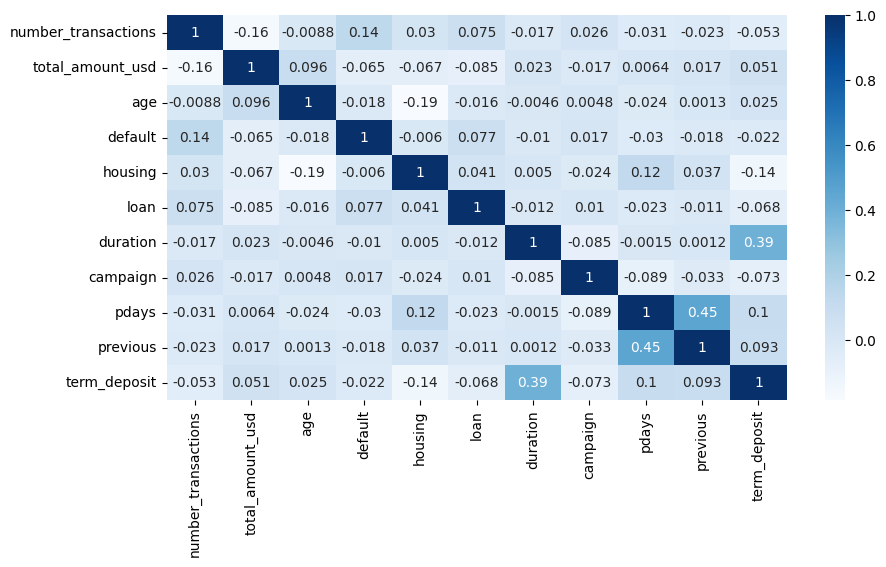

In [29]:
# visualise the data

plt.rcParams["figure.figsize"] = (10,5)
sns.heatmap(corr, cmap="Blues", annot = True);


### Feature Selection

In [31]:
# drop the date time column, as requires further processing

users_data_cleaned = users_data.drop(['date_joined'], axis = 1)

In [32]:
# check if dropped

list(users_data_cleaned)

['user_id',
 'number_transactions',
 'total_amount_usd',
 'age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'term_deposit',
 'device']

In [33]:
print(users_data.shape)
print(users_data_cleaned.shape)

(45209, 19)
(45209, 18)


### Handling missing data - we will pick this up in lecture 05

In [24]:
# identify missing values

users_data_cleaned.isnull().sum()

user_id                    0
number_transactions     9999
total_amount_usd        9999
age                        0
job                      288
marital                    0
education               1857
default                    0
housing                    0
loan                       0
contact                13018
duration                   0
campaign                   0
pdays                      0
previous                   0
poutcome               36957
term_deposit               0
device                    94
dtype: int64

In [25]:
# identify missing values

users_data_cleaned.isnull().mean()

# any columns of data that have more than 80% missing data?

user_id                0.000000
number_transactions    0.221173
total_amount_usd       0.221173
age                    0.000000
job                    0.006370
marital                0.000000
education              0.041076
default                0.000000
housing                0.000000
loan                   0.000000
contact                0.287952
duration               0.000000
campaign               0.000000
pdays                  0.000000
previous               0.000000
poutcome               0.817470
term_deposit           0.000000
device                 0.002079
dtype: float64

In [26]:
# drop columns with more than 80% missing data

users_data_cleaned = users_data_cleaned.drop(['poutcome'], axis = 1)

In [27]:
print(users_data_cleaned.shape)
print(users_data_cleaned.shape)

(45209, 17)
(45209, 17)


In [28]:
users_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45209 entries, 0 to 45215
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              45209 non-null  object 
 1   number_transactions  35210 non-null  float64
 2   total_amount_usd     35210 non-null  float64
 3   age                  45209 non-null  int64  
 4   job                  44921 non-null  object 
 5   marital              45209 non-null  object 
 6   education            43352 non-null  object 
 7   default              45209 non-null  bool   
 8   housing              45209 non-null  bool   
 9   loan                 45209 non-null  bool   
 10  contact              32191 non-null  object 
 11  duration             45209 non-null  int64  
 12  campaign             45209 non-null  int64  
 13  pdays                45209 non-null  int64  
 14  previous             45209 non-null  int64  
 15  term_deposit         45209 non-null 

In [29]:
# fill features with numerical data types null values with 0

users_data_cleaned.number_transactions.fillna(0, inplace = True)
users_data_cleaned.total_amount_usd.fillna(0, inplace = True)


In [30]:
# fill features with non numerical data types null values with Unknown

users_data_cleaned.job.fillna("Unknown", inplace = True)
users_data_cleaned.education.fillna("Unknown", inplace = True)
users_data_cleaned.contact.fillna("Unknown", inplace = True)
users_data_cleaned.device.fillna("Unknown", inplace = True)


In [31]:
# check if any missing values exist

users_data_cleaned.isnull().sum()

user_id                0
number_transactions    0
total_amount_usd       0
age                    0
job                    0
marital                0
education              0
default                0
housing                0
loan                   0
contact                0
duration               0
campaign               0
pdays                  0
previous               0
term_deposit           0
device                 0
dtype: int64